<a href="https://colab.research.google.com/github/guilhermelaviola/DataScienceApplicationsInComputerVision/blob/main/Class10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Manipulation and Visualization with R**
The R language is widely used for data manipulation and visualization, thanks to its flexibility and the power of packages like dplyr and ggplot2, both from the tidyverse. dplyr allows you to perform complex data manipulation tasks quickly and intuitively, facilitating the filtering, transformation, and aggregation of large data sets. ggplot2 is a versatile tool for creating powerful visualizations that allow you to communicate findings clearly and visually appealing. Together, these packages enable an efficient workflow that ranges from data preparation to generating informative graphics.

Data manipulation and visualization are fundamental parts of data analysis, and the R language stands out for offering powerful and efficient tools for these tasks. R is widely adopted by data scientists, primarily due to its vast collection of packages like dplyr and ggplot2, which facilitate the transformation, cleaning, and visualization of large data sets.

In [9]:
# Installing the necessary packages to use R on Google Colab:
!pip install -q rpy2
#Loading the R extension on Colab:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [10]:
%%R
# Installing tidyverse packages:
install.packages('tidyverse')

# Loading the packages
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/tmp/RtmpfQRsGm/downloaded_packages’


In [13]:
%%R
# Creating a fictional dataset with data from elections:
data <- tibble(
    Region = rep(c('North', 'East', 'West', 'South'), each = 3),
    Year = rep(c('2016', '2020', '2024'), times = 4),
    Party_A = c(50000, 52000, 54000, 30000, 35000, 32000, 45000, 47000, 49000, 60000, 58000, 62000),
    Party_B = c(45000, 47000, 46000, 32000, 31000, 30000, 48000, 50000, 52000, 59000, 60000, 61000),
    Party_C = c(20000, 25000, 22000, 15000, 18000, 17000, 23000, 24000, 25000, 28000, 27000, 29000)
)

# Displaying the first 10 rows:
print(head(data))

# Manipulating the data by calculating the average votes by region:
data <- data %>%
mutate(Average_Votes_A = rowMeans(select(., Party_A)),
       Average_Votes_B = rowMeans(select(., Party_B)),
       Average_Votes_C = rowMeans(select(., Party_C)))

# Displaying the dataset after the manipulation:
print(data)

# A tibble: 6 × 5
  Region Year  Party_A Party_B Party_C
  <chr>  <chr>   <dbl>   <dbl>   <dbl>
1 North  2016    50000   45000   20000
2 North  2020    52000   47000   25000
3 North  2024    54000   46000   22000
4 East   2016    30000   32000   15000
5 East   2020    35000   31000   18000
6 East   2024    32000   30000   17000
# A tibble: 12 × 8
   Region Year  Party_A Party_B Party_C Average_Votes_A Average_Votes_B
   <chr>  <chr>   <dbl>   <dbl>   <dbl>           <dbl>           <dbl>
 1 North  2016    50000   45000   20000           50000           45000
 2 North  2020    52000   47000   25000           52000           47000
 3 North  2024    54000   46000   22000           54000           46000
 4 East   2016    30000   32000   15000           30000           32000
 5 East   2020    35000   31000   18000           35000           31000
 6 East   2024    32000   30000   17000           32000           30000
 7 West   2016    45000   48000   23000           45000           48000
 8 

In [14]:
%%R
# Transforming the data into a long format:
data_long <- data %>%
  pivot_longer(cols = c(Party_A, Party_B, Party_C), names_to = 'Party', values_to = 'Votes')

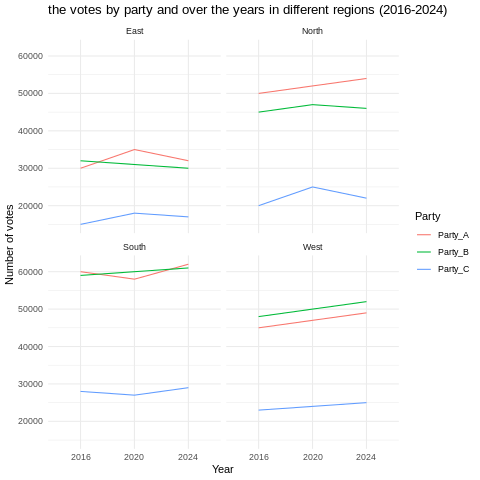

In [15]:
%%R
# Creating a view with the votes by party and over the years in different regions:
ggplot(data_long, aes(x = Year, y = Votes, group = Party, color = Party)) +
geom_line() +
facet_wrap(~ Region) +
labs (title='the votes by party and over the years in different regions (2016-2024)', x = 'Year', y = 'Number of votes') +
theme_minimal()